In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset('car_crashes')

In [3]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


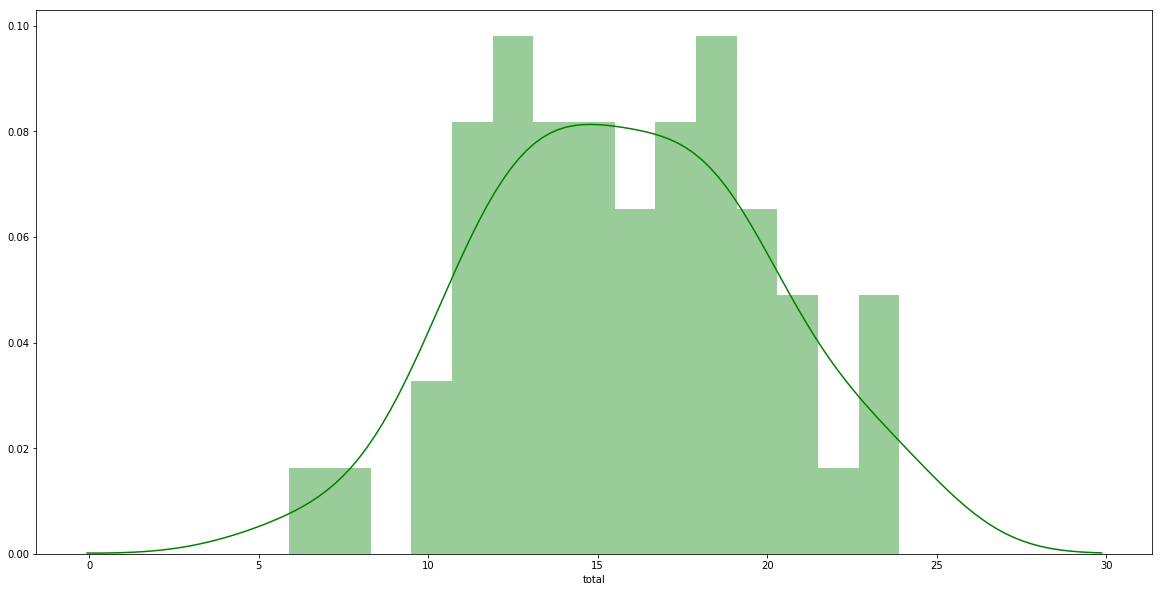

In [11]:
plt.figure(figsize=(20,10))
sns.distplot(df['total'],bins=15, color='green')

C:\Users\Gwenn\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1440x720 with 0 Axes>

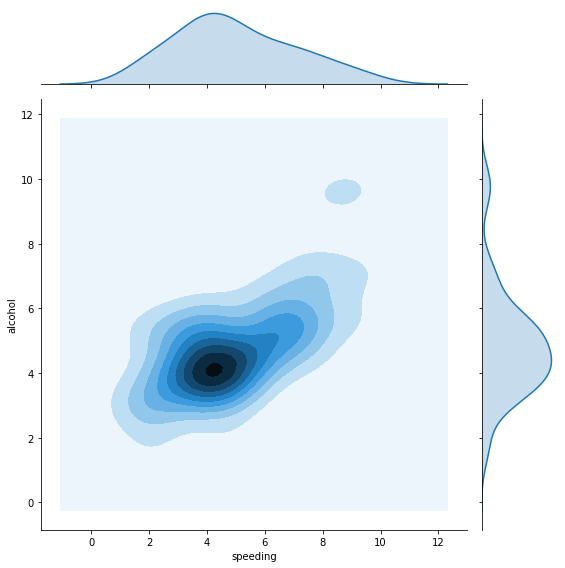

In [5]:
plt.figure(figsize=(20,10))
sns.jointplot(x=df['speeding'],y=df['alcohol'],kind='kde',data=df,size=8)

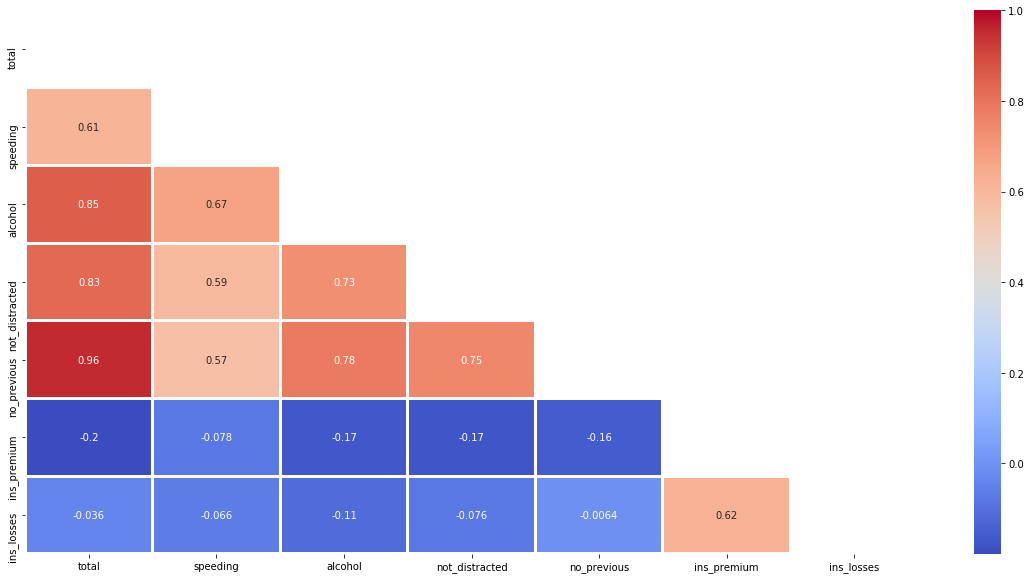

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=2,mask=np.triu(df.corr()))

C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


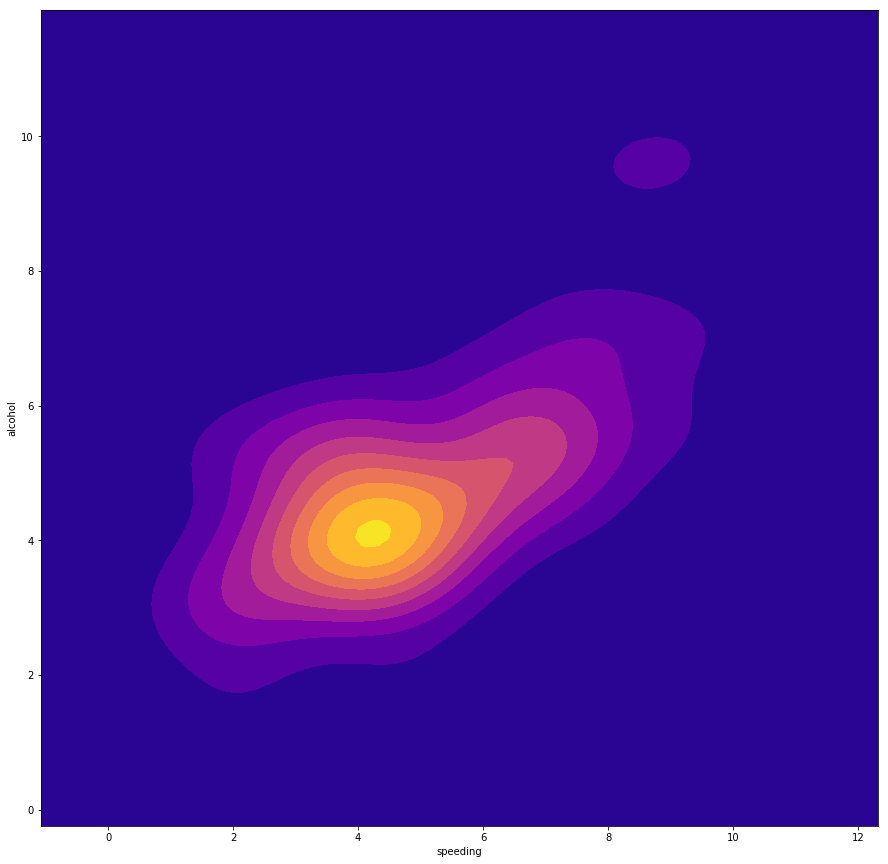

In [7]:
plt.figure(figsize=(15,15))
sns.kdeplot(df['speeding'],df['alcohol'],cmap='plasma',shade='dark')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

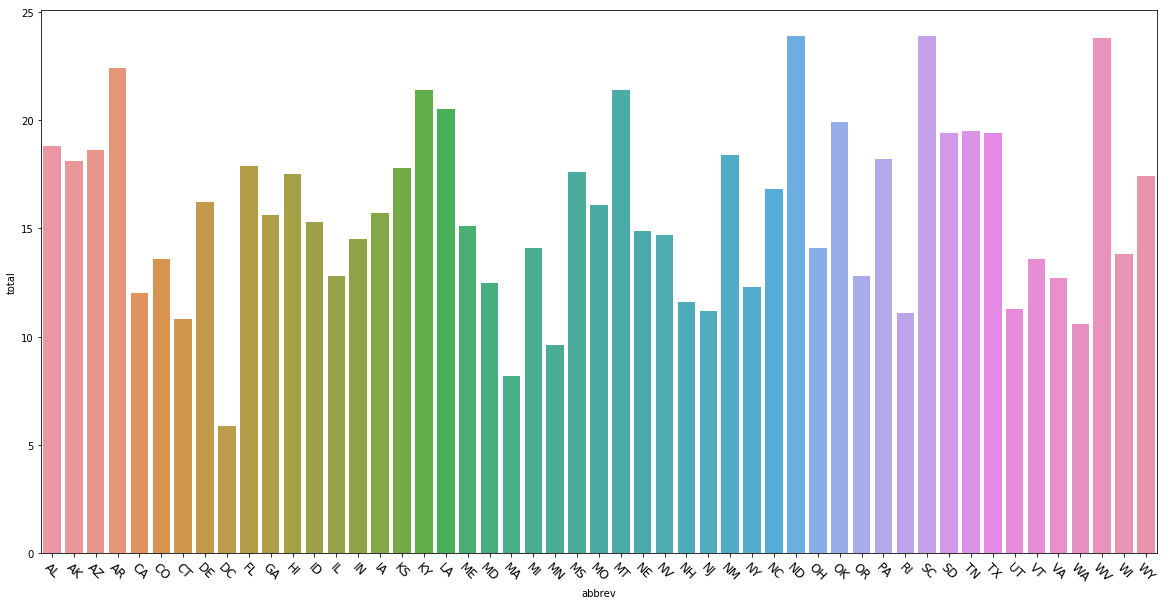

In [112]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['abbrev'],y=df['total'],data=df)
plt.xticks(rotation=-45,fontsize=12)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [13]:
df.keys()

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [14]:
X=df[['speeding','alcohol', 'not_distracted', 'no_previous','ins_premium', 'ins_losses']]
y=df['total']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
pred=lm.predict(X_test)

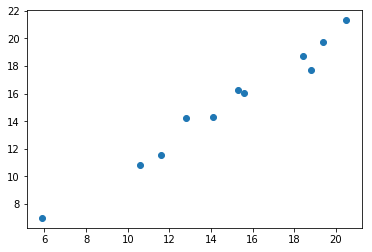

In [19]:
plt.scatter(y_test,pred)

In [20]:
from sklearn import metrics

In [33]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score',metrics.r2_score(y_test,pred))

MAE: 0.6600447188149408
MSE: 0.6610523195331649
RMSE: 0.813051240410569
R2 Score 0.9627244665662338


In [34]:
lm.coef_

array([0.44757845, 0.15266189, 0.74085149])

In [35]:
coeficients=pd.DataFrame(lm.coef_,X.columns,columns=['Coeficients'])

In [36]:
coeficients

,Coeficients
alcohol,0.447578
not_distracted,0.152662
no_previous,0.740851


In [37]:
X=df[['alcohol', 'not_distracted', 'no_previous']]
y=df['total']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [39]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
pred=lm.predict(X_test)

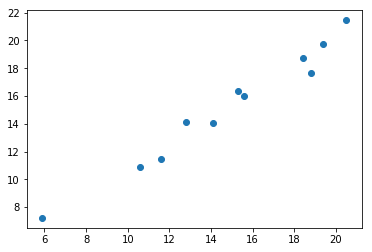

In [41]:
plt.scatter(y_test,pred)

In [42]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score',metrics.r2_score(y_test,pred))

MAE: 0.6600447188149408
MSE: 0.6610523195331649
RMSE: 0.813051240410569
R2 Score 0.9627244665662338


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [44]:
rfc=RandomForestRegressor(n_estimators=100)

In [45]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
pred=rfc.predict(X_test)

In [47]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score',metrics.r2_score(y_test,pred))

RMSE: 1.1975964565442219
R2 Score 0.919125978637736


In [49]:
tree=DecisionTreeRegressor()

In [50]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
pred=tree.predict(X_test)

In [53]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score',metrics.r2_score(y_test,pred))

RMSE: 1.9449234619201012
R2 Score 0.7866989151101667


In [54]:
ada=AdaBoostRegressor()

In [55]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [56]:
pred=ada.predict(X_test)

In [57]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score',metrics.r2_score(y_test,pred))

RMSE: 1.4058093153839775
R2 Score 0.8885600605927448
